In [7]:
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# vectorize module
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score #정확도 계산

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

# 1. 모든 단어 사용

## 1-1. 데이터 불러오기

In [8]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)

In [9]:
print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


In [10]:
num_classes = max(y_train) + 1
print('클래스의 수 : {}'.format(num_classes))

클래스의 수 : 46


## 1-2. 데이터 복원

In [11]:
word_index = reuters.get_word_index(path="reuters_word_index.json")
index_to_word = { index+3 : word for word, index in word_index.items() }
# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token

565248/550378 [==============================] - 0s 0us/step


In [12]:
# 훈련용 뉴스데이터 복원
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded
print(len(x_train))

8982


In [13]:
# 테스트용 뉴스데이터 복원
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded
print(len(x_test))

2246


In [18]:
x_train[:5]

['<sos> mcgrath rentcorp said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3',
 "<sos> generale de banque sa lt genb br and lt heller overseas corp of chicago have each taken 50 pct stakes in factoring company sa belgo factors generale de banque said in a statement it gave no financial details of the transaction sa belgo factors' turnover in 1986 was 17 5 billion belgian francs reuter 3",
 '<sos> shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 328 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share reflect th

In [20]:
x_test[:5]

['<sos> the great atlantic and pacific tea co said its three year 345 mln dlr capital program will be be substantially increased to accommodate growth and expansion plans for waldbaum inc and shopwell inc over the next two years a and p said the acquisition of shopwell in august 1986 and waldbaum in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations jumped 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the expanded capital program but it did say it completed the first year of the program during 1986 a and p is 52 4 pct owned by lt tengelmann warenhandelsgesellschaft of west germany reuter 3',
 "<sos> philippine sugar production in the 1987 88 crop year ending august has been set at 1 6 mln tonnes up from a provisional 1 3 mln tonnes this year sugar regulatory administration sra chairman arsenio yulo said yu

## 1-3. 벡터화

In [21]:
dtmvector = CountVectorizer() # 훈련 데이터를 DTM으로 변환
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 26506)


In [22]:
tfidf_transformer = TfidfTransformer() # 다시 TF-IDF Matrix로 변환
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 26506)


In [23]:
x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

## 1-4. 머신러닝 모델 

* 나이브 베이즈 분류기

In [25]:
model = MultinomialNB()
model.fit(tfidfv, y_train)

predicted = model.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.5997328584149599


In [26]:
print(classification_report(y_test, model.predict(tfidfv_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.79      0.21      0.33       105
           2       0.00      0.00      0.00        20
           3       0.72      0.92      0.81       813
           4       0.45      0.96      0.61       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       0.00      0.00      0.00        25
          10       0.00      0.00      0.00        30
          11       0.80      0.29      0.42        83
          12       0.00      0.00      0.00        13
          13       0.00      0.00      0.00        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.75      0.18      0.29        99
          17       0.00    

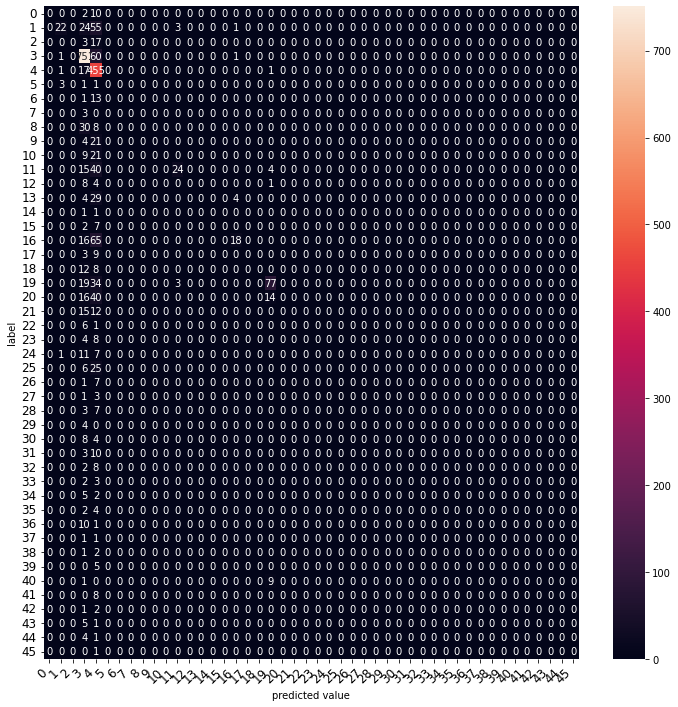

In [27]:
def graph_confusion_matrix(model, x_test, y_test):#, classes_name):
  df_cm = pd.DataFrame(confusion_matrix(y_test, model.predict(x_test)))#, index=classes_name, columns=classes_name)
  fig = plt.figure(figsize=(12,12))
  heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
  heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
  heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=12)
  plt.ylabel('label')
  plt.xlabel('predicted value')

graph_confusion_matrix(model, tfidfv_test, y_test)

* CNB

In [30]:
cb = ComplementNB()
cb.fit(tfidfv, y_train)

predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7649154051647373


* 로지스틱 회귀

In [31]:
lr = LogisticRegression(C=10000, penalty='l2')
lr.fit(tfidfv, y_train)

predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.813446126447017


* 선형 서포트 벡터 머신

In [32]:
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)
lsvc.fit(tfidfv, y_train)

predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7849510240427426


*  결정 트리

In [33]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)

predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.6211041852181657


* 랜덤 포레스트

In [34]:
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train)

predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.6544968833481746


* 그래디언트 부스팅 트리

In [35]:
grbt = GradientBoostingClassifier(random_state=0) # verbose=3
grbt.fit(tfidfv, y_train)

predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7702582368655387


# 2. 빈도수 상위 5,000개의 단어만 사용

## 2-1. 데이터 불러오기

In [39]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=5000, test_split=0.2)

In [40]:
print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


In [41]:
num_classes = max(y_train) + 1
print('클래스의 수 : {}'.format(num_classes))

클래스의 수 : 46


## 2-2. 데이터 복원

In [42]:
word_index = reuters.get_word_index(path="reuters_word_index.json")
index_to_word = { index+3 : word for word, index in word_index.items() }
# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token

In [43]:
# 훈련용 뉴스데이터 복원
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded
print(len(x_train))

# 테스트용 뉴스데이터 복원
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded
print(len(x_test))

8982
2246


## 2-3. 벡터화

In [44]:
dtmvector = CountVectorizer()  # DTM 생성
tfidf_transformer = TfidfTransformer()  # TF-IDF 생성

# 훈련용 데이터
x_train_dtm = dtmvector.fit_transform(x_train)
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(x_train_dtm.shape)
print(tfidfv.shape)

# 테스트용 데이터
x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

(8982, 4867)
(8982, 4867)


## 2-4. 머신러닝 모델

In [45]:
# 나이브 베이즈 분류기 
model = MultinomialNB()
model.fit(tfidfv, y_train)

predicted = model.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("나이브 베이즈 정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
    
# CNB
cb = ComplementNB()
cb.fit(tfidfv, y_train)
    
cb_predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("CNB 정확도:", accuracy_score(y_test, cb_predicted)) #예측값과 실제값 비교
    
# 로지스틱 회귀 
lr = LogisticRegression(C=10000, penalty='l2')
lr.fit(tfidfv, y_train)

lr_predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("로지스틱 회귀 정확도:", accuracy_score(y_test, lr_predicted)) #예측값과 실제값 비교
    
# 선형 서포트 벡터 머신 
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)
lsvc.fit(tfidfv, y_train)
    
lsvc_predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("선형 서포트 벡터 머신 정확도:", accuracy_score(y_test, lsvc_predicted)) #예측값과 실제값 비교
    
# 결정 트리(Decision Tree) 
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)
    
tree_predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("결정 트리 정확도:", accuracy_score(y_test, tree_predicted)) #예측값과 실제값 비교
    
# 랜덤 포레스트(Random Forest)
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train)
    
forest_predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("랜덤 포레스트 정확도:", accuracy_score(y_test, forest_predicted)) #예측값과 실제값 비교
    
# 그래디언트 부스팅 트리(GradientBoostingClassifier)
grbt = GradientBoostingClassifier(random_state=0, verbose=3) # verbose=3
grbt.fit(tfidfv, y_train)

grbt_predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("그래디언트 부스팅 트리 정확도:", accuracy_score(y_test, grbt_predicted)) #예측값과 실제값 비교

나이브 베이즈 정확도: 0.6731967943009796
CNB 정확도: 0.7707034728406055
로지스틱 회귀 정확도: 0.8058771148708815
선형 서포트 벡터 머신 정확도: 0.7680320569902048
결정 트리 정확도: 0.6179875333926982
랜덤 포레스트 정확도: 0.701246660730187
      Iter       Train Loss   Remaining Time 
         1           1.4697           17.22m
         2     2131099.0239           17.30m
         3 113352934366748750033493137947714414201794552363528671409179356940992512.0000           17.12m
         4 645005367195105573487290209089081189090170195029150070319832395667206596719018218881024.0000           16.94m
         5 443067299530301659980374363525949995629695549691559890285869350923592723545213280554158712204202745088665306932510573934053386280801140736.0000           16.76m
         6 443067299530301659980374363525949995629695549691559890285869350923592723545213280554158712204202745088665306932510573934053386280801140736.0000           16.58m
         7 44306729953030165998037436352594999562969554969155989028586935092359272354521328055415871220

# 3. 직접 단어 갯수를 설정(10000개)

## 3-1. 데이터 불러오기

In [46]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000, test_split=0.2)

In [47]:
print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


In [48]:
num_classes = max(y_train) + 1
print('클래스의 수 : {}'.format(num_classes))

클래스의 수 : 46


## 3-2. 데이터 복원

In [49]:
word_index = reuters.get_word_index(path="reuters_word_index.json")
index_to_word = { index+3 : word for word, index in word_index.items() }
# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token

In [50]:
# 훈련용 뉴스데이터 복원
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded
print(len(x_train))

# 테스트용 뉴스데이터 복원
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded
print(len(x_test))

8982
2246


## 3-3. 벡터화

In [51]:
dtmvector = CountVectorizer()  # DTM 생성
tfidf_transformer = TfidfTransformer()  # TF-IDF 생성

# 훈련용 데이터
x_train_dtm = dtmvector.fit_transform(x_train)
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(x_train_dtm.shape)
print(tfidfv.shape)

# 테스트용 데이터
x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

(8982, 9670)
(8982, 9670)


## 3-4. 머신러닝 모델

In [ ]:
# 나이브 베이즈 분류기 
model = MultinomialNB()
model.fit(tfidfv, y_train)

predicted = model.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("나이브 베이즈 정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
    
# CNB
cb = ComplementNB()
cb.fit(tfidfv, y_train)
    
cb_predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("CNB 정확도:", accuracy_score(y_test, cb_predicted)) #예측값과 실제값 비교
    
# 로지스틱 회귀 
lr = LogisticRegression(C=10000, penalty='l2')
lr.fit(tfidfv, y_train)

lr_predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("로지스틱 회귀 정확도:", accuracy_score(y_test, lr_predicted)) #예측값과 실제값 비교
    
# 선형 서포트 벡터 머신 
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)
lsvc.fit(tfidfv, y_train)
    
lsvc_predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("선형 서포트 벡터 머신 정확도:", accuracy_score(y_test, lsvc_predicted)) #예측값과 실제값 비교
    
# 결정 트리(Decision Tree) 
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)
    
tree_predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("결정 트리 정확도:", accuracy_score(y_test, tree_predicted)) #예측값과 실제값 비교
    
# 랜덤 포레스트(Random Forest)
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train)
    
forest_predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("랜덤 포레스트 정확도:", accuracy_score(y_test, forest_predicted)) #예측값과 실제값 비교
    
# 그래디언트 부스팅 트리(GradientBoostingClassifier)
grbt = GradientBoostingClassifier(random_state=0) # verbose=3
grbt.fit(tfidfv, y_train)

grbt_predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("그래디언트 부스팅 트리 정확도:", accuracy_score(y_test, grbt_predicted)) #예측값과 실제값 비교

나이브 베이즈 정확도: 0.6567230632235085
CNB 정확도: 0.7707034728406055
로지스틱 회귀 정확도: 0.8076580587711487
선형 서포트 벡터 머신 정확도: 0.7751558325912734
결정 트리 정확도: 0.6202137132680321
랜덤 포레스트 정확도: 0.674087266251113


## 회고

* 단어 수 별로 크게 성능 차이를 보이지 않았다.
* 보팅은 이상하게 돌아가지 않아 제외하였다.
* 주변 제약으로 딥러닝을 써보지 못했다. 이후 보완하고자 한다.